In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os
os.chdir('/drive/My Drive/deep learning/Hackathon_main/MAF')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set_style('darkgrid')

In [0]:
## The dataset consists of data collected from heavy Motors in everyday usage. The system in focus is the Motor Absolute Force (MAF) which generates
 forceful air that are utilized in various functions in a motor, such as braking and gear changes. The datasets' True class consists of component 
 failures for a specific component of the MAF system. The negative class consists of motors with failures for components not related to the MAF. 
 The data consists of a subset of all available data, selected by experts.  


In [0]:
train_data = pd.read_csv('maf_train.csv')

In [0]:
test_data = pd.read_csv('maf_test.csv')

In [0]:
train_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,target
0,0,4,na,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,...,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0,False
1,1,192902,na,na,na,na,na,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,na,303054,504304,15370854,14883810,2202728,642438,na,0,0,0,na,na,0,0,0,0,0,0,2102,...,9869694,na,na,na,na,na,na,na,na,na,na,58028,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,na,na,False
2,2,42812,na,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,...,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0,False
3,3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,...,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0,False
4,4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,...,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0,False


In [0]:
test_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,0,21992,na,0,na,0,0,0,0,0,0,5140,894686,3094446,3562244,1005258,46028,4529264,0,0,0,0,0,8110056,7615742,1096512,429038,0,0,44822,0,0,0,0,0,0,0,0,20748,7752412,...,na,na,6322,226,0,0,0,0,0,0,0,0,38036,16128,3366,0,0,125662,25350,2306440,794568,0,0,0,0,0,1882.26,2134,6777340,940376,272368,92340,145288,131818,86808,62154,96058,3252,0,0
1,1,21384,na,na,na,na,na,0,0,0,72938,895660,346150,85970,698,0,0,429242,0,0,na,73348,99450,1186318,1184218,217000,62682,na,0,0,0,na,na,0,0,0,0,0,0,0,...,na,na,na,na,na,na,na,na,na,na,na,na,5642,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,401894,92212,68412,30306,70896,80616,133222,514760,9098,0,na,na
2,2,2300,na,620,560,0,0,0,0,0,0,242,38786,92512,11034,0,0,58910,0,0,0,0,0,134150,119290,29736,9370,0,0,0,0,360,78,0,0,0,0,0,4342,102986,...,32,128740,182,66,0,0,0,0,0,0,0,0,912,924,438,0,0,3208,794,712700,72178,0,0,0,0,1299900,269.58,140,17620,16100,14516,9308,27072,54904,2942,112,0,0,0,0
3,3,40588,na,2130706432,164,0,0,0,0,0,0,620,437006,1921128,721842,43640,0,1416262,0,142,0,0,0,2887006,2526312,508820,274142,0,0,0,0,576,146,0,0,0,0,0,211120,2198260,...,36,2506322,4432,156,0,0,0,0,0,0,0,0,25564,36684,12260,0,0,69526,16226,7329340,742542,0,0,0,0,587100,1515.54,1796,717306,527364,411056,218562,449834,344838,231628,119826,101478,2344,0,0
4,4,5268,na,420,340,0,0,0,0,0,0,242,71336,131044,58760,586,0,103718,0,0,0,0,0,223636,171150,98488,34106,0,0,0,0,156,86,0,0,0,0,0,3404,257358,...,0,156342,608,154,0,0,0,0,0,0,0,0,2570,440,146,0,0,5916,1170,64880,11510,138128,256,0,0,336560,380.7,414,125076,58518,13656,4000,9050,50890,754,22,2,0,0,0


In [0]:
train_data1=train_data.drop(['Unnamed: 0','target'],axis = 1)
test_data = test_data.drop('Unnamed: 0',axis = 1)

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 77.8+ MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 20.8+ MB


In [0]:
train_data1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Length: 170, dtype: int64

In [0]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,na,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,na,na,na,na,na,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,na,303054,504304,15370854,14883810,2202728,642438,na,0,0,0,na,na,0,0,0,0,0,0,2102,2102014,...,0,9869694,na,na,na,na,na,na,na,na,na,na,58028,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,na,na
2,42812,na,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0


In [0]:
train_data1.shape,test_data.shape

((60000, 170), (16000, 170))

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 77.8+ MB


In [0]:
train_data1 = train_data1.replace('na','0')
#train_data.astype('float',inplace = True)


In [0]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,0,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,0,0,0,0,0,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,0,303054,504304,15370854,14883810,2202728,642438,0,0,0,0,0,0,0,0,0,0,0,0,2102,2102014,...,0,9869694,0,0,0,0,0,0,0,0,0,0,58028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,0,0
2,42812,0,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0


In [0]:
test_data = test_data.replace('na','0')

In [0]:
for i in train_data1:
    train_data1[i] = pd.to_numeric(train_data1[i])

In [0]:
for i in test_data:
    test_data[i] = pd.to_numeric(test_data[i])

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: float64(5), int64(165)
memory usage: 77.8 MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 170 entries, 0 to 169
dtypes: float64(5), int64(165)
memory usage: 20.8 MB


In [0]:
train_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,0,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0.00,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,0,0,0,0,0,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,0,303054,504304,15370854,14883810,2202728,642438,0,0,0,0,0,0,0,0,0,0,0,0,2102,2102014,...,0,9869694,0,0,0,0,0,0,0,0,0,0,58028,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,0,0
2,42812,0,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.20,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,61198,0,0,0,0,0,0,0,0,0,3528,218580,2676612,881950,5416,0,1935564,0,54,0,0,0,3397778,3004198,945612,312554,0,0,0,0,0,0,0,0,0,0,0,51028,1133196,2494126,...,0,0,2740,146,0,0,0,0,0,0,0,0,28516,61248,9072,0,0,137236,22348,6569880,983290,0,0,0,0,1734200,0.00,0,320890,758460,540078,268822,546872,497622,320156,178654,318332,36200,0,0
59996,1562,0,84,82,0,0,0,0,0,0,148,13220,86104,6064,0,0,37596,0,0,0,0,0,102070,90560,18348,7256,0,0,0,0,86,20,0,0,0,0,0,0,58188,47348,...,0,89688,174,40,0,0,0,0,0,0,0,0,702,170,50,0,0,1948,370,7760,776,0,0,0,0,561900,142.80,114,19310,15670,7158,2262,7686,52778,320,114,238,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,80198,0,958,912,0,0,0,0,0,0,17770,1731276,3415252,735870,77096,6770,2620304,0,0,0,0,0,5182438,4278560,1674796,736710,0,0,1364,0,550,176,0,0,0,0,0,225352,4513424,805920,...,36,5129026,3936,108,0,0,0,0,0,0,0,0,43346,72012,15404,0,0,182034,33786,1405780,306094,6336240,444,0,0,494330,2479.92,2648,1006992,1234036,913318,466808,955986,772568,510356,107034,16936,0,0,0


In [0]:
# train
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()
ss = ss1.fit_transform(train_data1)

In [0]:
# test
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()
ss1 = ss1.fit_transform(test_data)
x_test= pd.DataFrame(ss1)

In [0]:
X = pd.DataFrame(ss)
y = train_data['target']

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 170))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

# Adding the thrid hidden layer
classifier.add(Dense(output_dim = 3, init = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=6, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="he_uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="he_uniform")`
  del sys.path[0]


In [0]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 1026      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 1,093
Trainable params: 1,093
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.




Train on 32159 samples, validate on 15841 samples
Epoch 1/100





32159/32159 [==============================] - 7s 207us/step - loss: 0.0647 - acc: 0.9817 - val_loss: 0.0485 - val_acc: 0.9837
Epoch 2/100
32159/32159 [==============================] - 6s 176us/step - loss: 0.0388 - acc: 0.9864 - val_loss: 0.0447 - val_acc: 0.9856
Epoch 3/100
32159/32159 [==============================] - 6s 179us/step - loss: 0.0334 - acc: 0.9882 - val_loss: 0.0403 - val_acc: 0.9864
Epoch 4/100
32159/32159 [==============================] - 6s 181us/step - loss: 0.0302 - acc: 0.9895 - val_loss: 0.0383 - val_acc: 0.9872
Epoch 5/100
32159/32159 [==============================] - 6s 181us/step - loss: 0.0278 - acc: 0.9900 - val_loss: 0.0382 - val_acc: 0.9872
Epoch 6/100
32159/32159 [==============================] - 6s 179us/step - loss: 0.0268 - acc: 0.9906 - val_loss: 0.0368 - val_acc: 0.9882
Epoch 7/100
32159/32159 [==============================] - 6s 180us/step - loss: 0.0258 - acc: 0.9908 - val_l

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


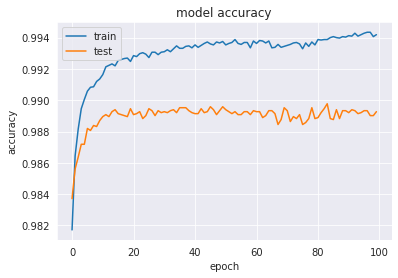

In [0]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


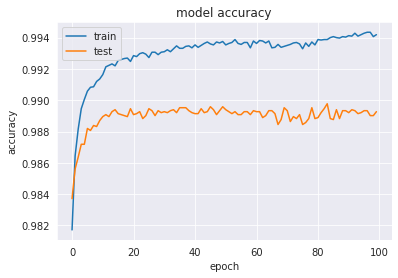

In [0]:
## list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[11756,    24],
       [   92,   128]])

In [0]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [0]:
score

0.9903333333333333

In [0]:
prediction = pd.DataFrame(y_pred.astype('int'))

In [0]:
prediction.to_csv('/drive/My Drive/deep learning/Hackathon_main/MAF/predict.csv',index=False)